In [ ]:
!pip install yfinance

In [ ]:
import datetime as dt
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [ ]:
import yfinance as yf
start_date = start = dt.datetime(2021, 4, 1)
end = dt.datetime(2022, 4, 30)
data = yf.download('BTC-USD',start,end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-26,40448.421875,40713.890625,37884.984375,38117.460938,38117.460938,34569088416
2022-04-27,38120.300781,39397.917969,37997.312500,39241.121094,39241.121094,30981015184
2022-04-28,39241.429688,40269.464844,38941.421875,39773.828125,39773.828125,33903704907
2022-04-29,39768.617188,39887.269531,38235.535156,38609.824219,38609.824219,30882994649
2022-04-30,38605.859375,38771.210938,37697.941406,37714.875000,37714.875000,23895713731


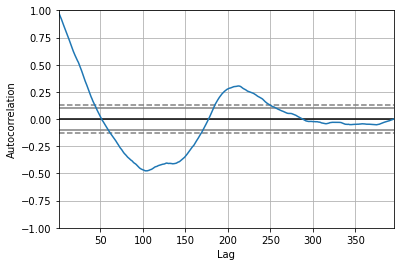

In [ ]:
autocorrelation_plot(data["Close"])
plt.show()

Text(0.5, 1.0, 'BTC Autocorrelation plot')

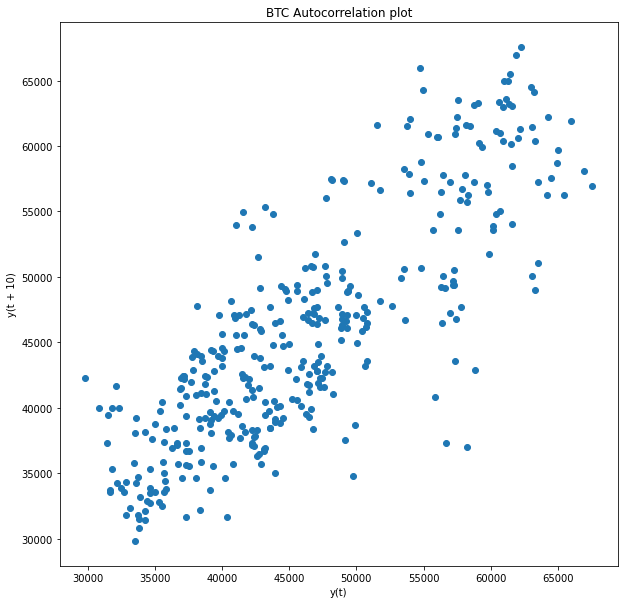

In [ ]:
plt.figure(figsize=(10,10))
lag_plot(data['Close'], lag=10)
plt.title('BTC Autocorrelation plot')

# **Modelling With Arima**

In [ ]:
model = ARIMA(data["Close"].values, order=(6,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  394
Model:                 ARIMA(6, 1, 0)   Log Likelihood               -3490.590
Method:                       css-mle   S.D. of innovations           1703.421
Date:                Thu, 05 May 2022   AIC                           6997.180
Time:                        08:25:54   BIC                           7028.991
Sample:                             1   HQIC                          7009.785
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -54.2313     86.646     -0.626      0.532    -224.055     115.593
ar.L1.D.y     -0.0507      0.050     -1.007      0.315      -0.149       0.048
ar.L2.D.y     -0.0280      0.050     -0.555      0.5

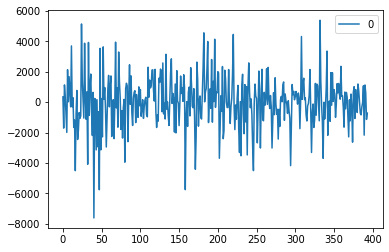

In [ ]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()

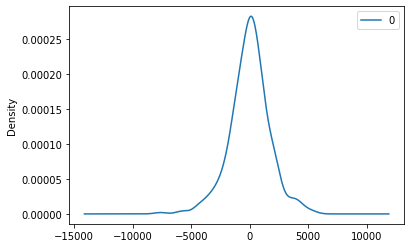

                 0
count   394.000000
mean      0.069891
std    1705.607926
min   -7619.819931
25%    -923.964374
50%      58.986870
75%     948.053545
max    5387.941643


In [ ]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [ ]:
df = pd.DataFrame(data, columns=["Close", "Volume"])
df = df.reset_index()
train = df[df["Date"] < "2022-01-01"]
test = df[df["Date"] >= "2022-01-01"]

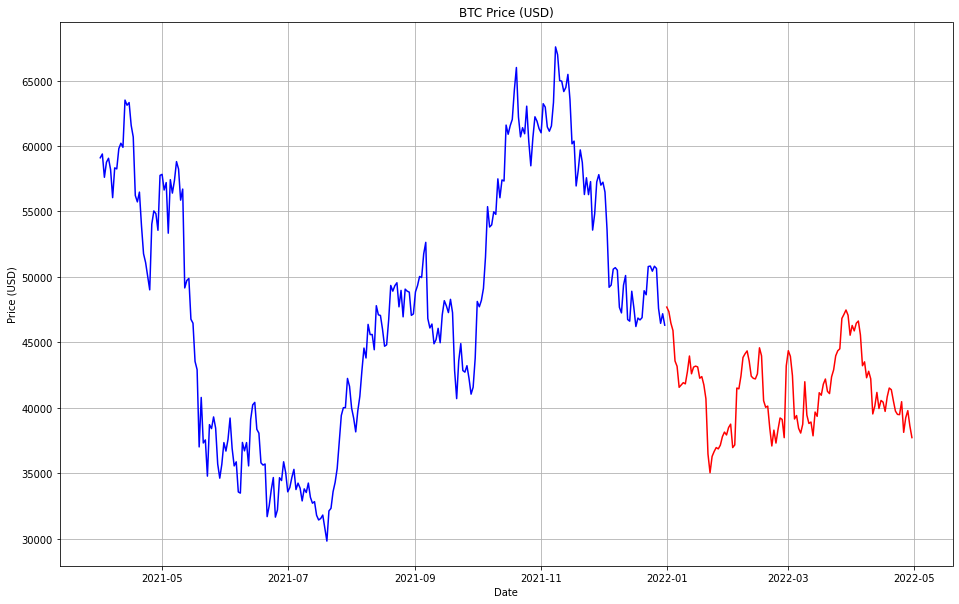

In [ ]:
plt.figure(figsize=(16,10))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.plot(train['Date'], train['Close'], 'blue', label = 'Train data')
plt.plot(test['Date'], test['Close'], 'red', label = 'Test data')
plt.title('BTC Price (USD)')
plt.show()

In [ ]:
train_val = train['Close'].values
test_val = test['Close'].values

In [ ]:
model = ARIMA(train_val, order=(6,1,0))
model_fit = model.fit(disp=0)
predictions = model_fit.forecast(len(test_val))

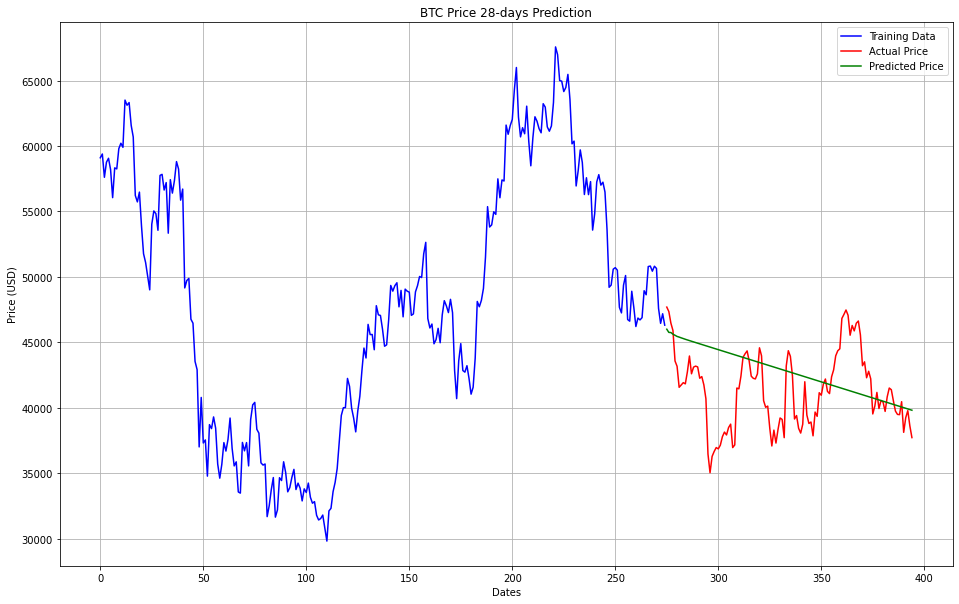

In [ ]:
plt.figure(figsize=(16,10))
plt.grid(True)
plt.plot(train.index, train['Close'], color='blue', label='Training Data')
plt.plot(test.index, test['Close'], color='red', label='Actual Price')
plt.plot(test.index, predictions[0], color='green', label='Predicted Price')
plt.title('BTC Price 28-days Prediction')
plt.xlabel('Dates')
plt.ylabel('Price (USD)')
plt.legend()

In [ ]:
history = [x for x in train_val]
predictions = []
for t in range(len(test_val)):
    model = ARIMA(history, order=(6,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_val[t]
    history.append(obs)

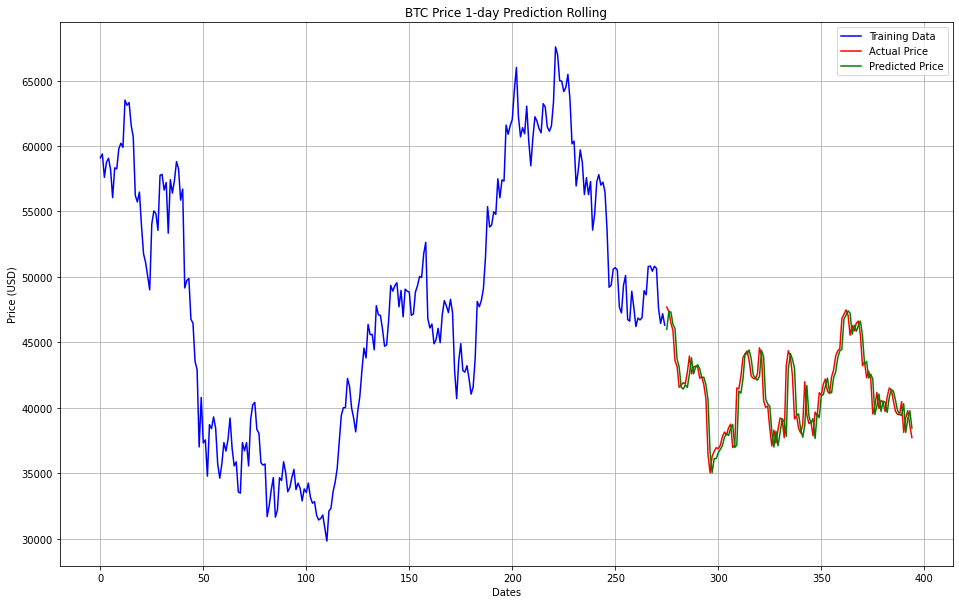

In [ ]:
plt.figure(figsize=(16,10))
plt.grid(True)
plt.plot(train.index, train['Close'], color='blue', label='Training Data')
plt.plot(test.index, test['Close'], color='red', label='Actual Price')
plt.plot(test.index, predictions, color='green', label='Predicted Price')
plt.title('BTC Price 1-day Prediction Rolling')
plt.xlabel('Dates')
plt.ylabel('Price (USD)')
plt.legend()

In [ ]:
r2_score(test_val, predictions)

0.7778934963440424

In [ ]:
mean_squared_error(test_val, predictions)

1867647.6360038854

In [ ]:
mean_absolute_error(test_val, predictions)

979.7283653506246